importando bibliotecas

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import metrics

Carregando dados

In [232]:
sales_data = pd.read_csv('Train.csv')

In [233]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Explorando dados


In [234]:
sales_data.shape

(8523, 12)

Tipos num

In [235]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [236]:
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


tratando dados nulos

In [237]:
sales_data['Item_Weight'].mean()

12.857645184135976

In [238]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

<ipython-input-238-ccef90bc2f24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)


In [239]:
sales_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [240]:
mode_outlet_size = sales_data.pivot_table(values='Outlet_Size',
                                          columns='Outlet_Type',
                                          aggfunc=(lambda x: x.mode()[0]))

In [241]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [242]:
sales_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [243]:
sns.set()

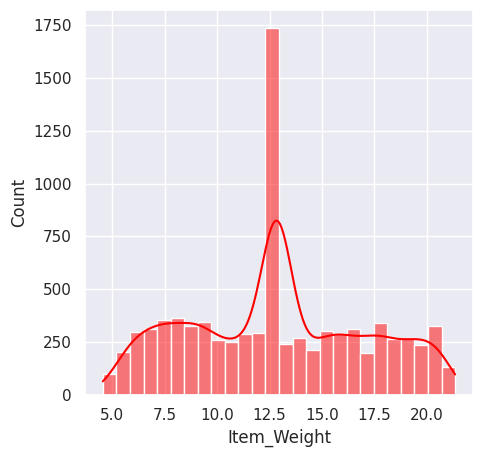

In [244]:
plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Weight'],color='red',kde=True)
plt.show()

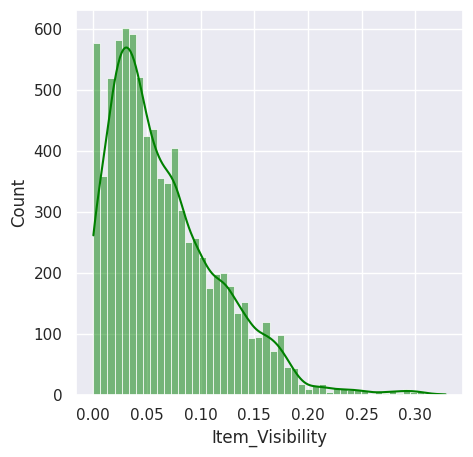

In [245]:
plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Visibility'],color='green',kde=True)
plt.show()


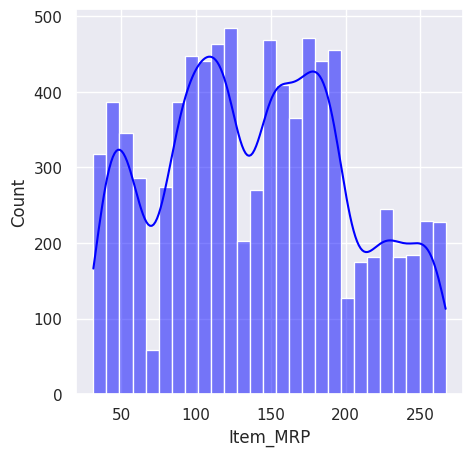

In [246]:
plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_MRP'],color='blue',kde=True)
plt.show()


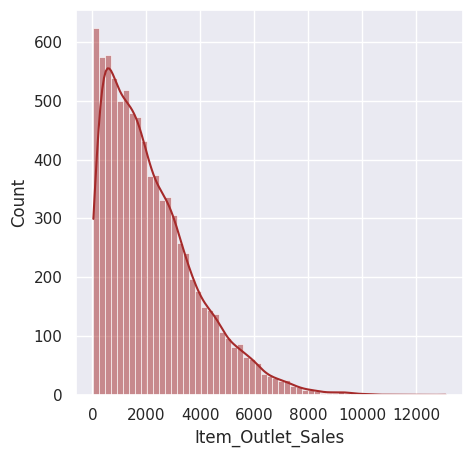

In [247]:
plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Outlet_Sales'],color='brown',kde=True)
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

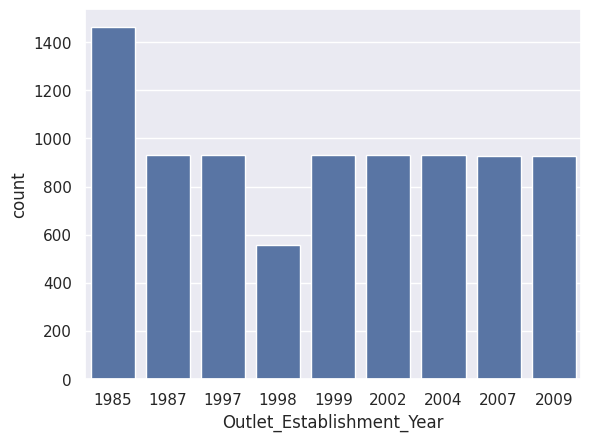

In [248]:
sns.countplot(x='Outlet_Establishment_Year',data=sales_data)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

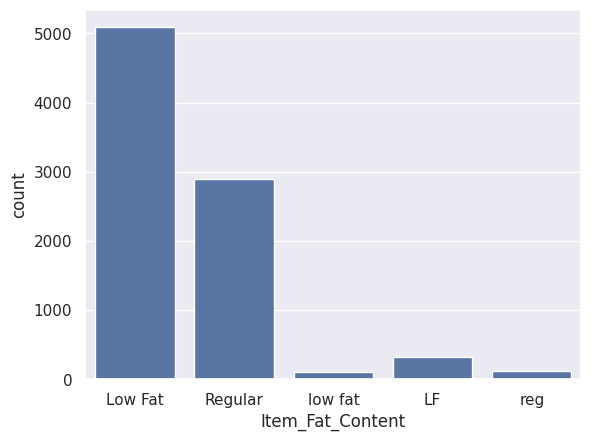

In [249]:
sns.countplot(x='Item_Fat_Content',data=sales_data)

<Axes: xlabel='Item_Type', ylabel='count'>

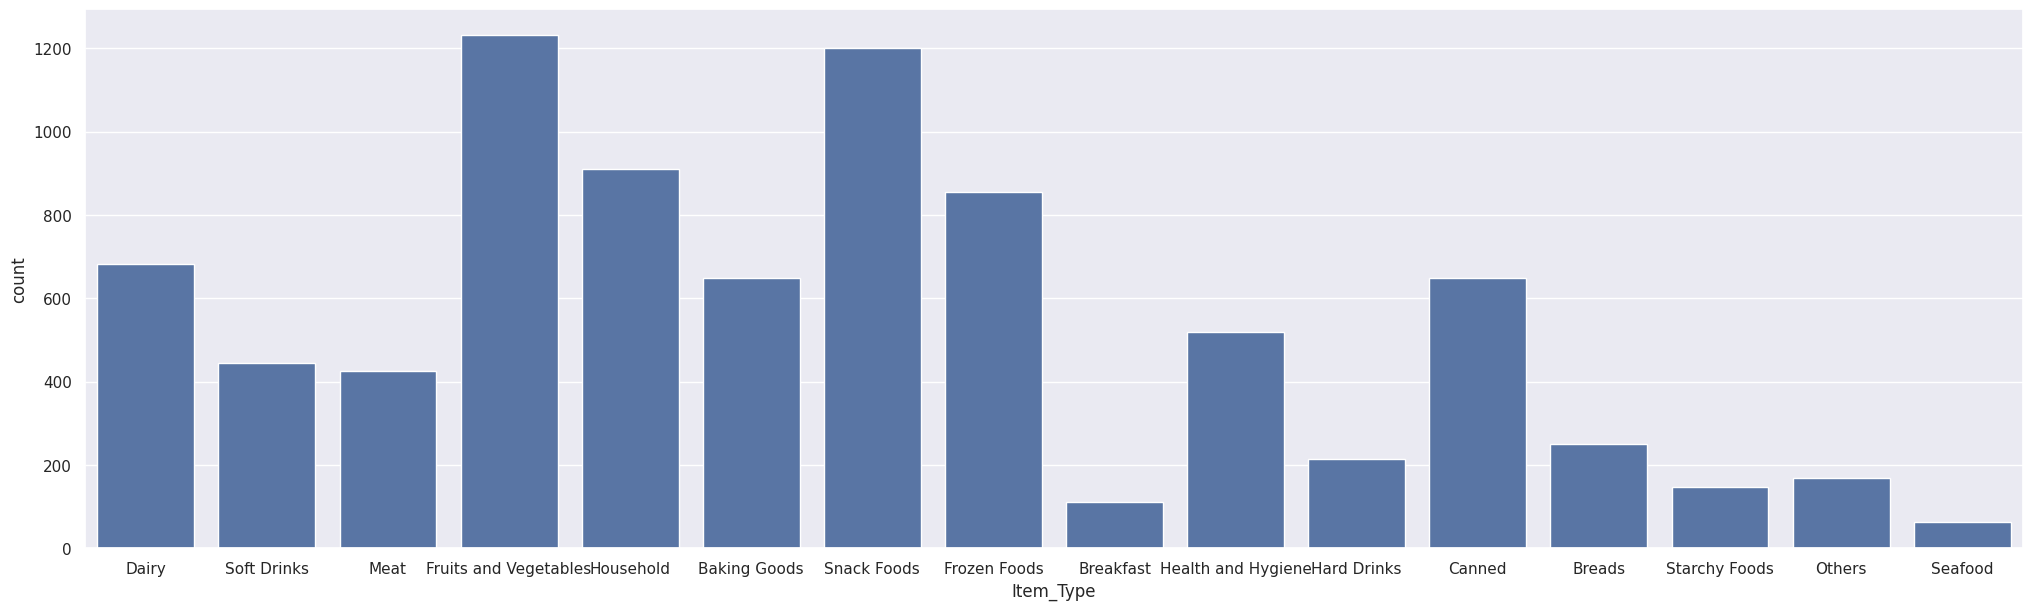

In [250]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=sales_data)

In [251]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [252]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [253]:
sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [254]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

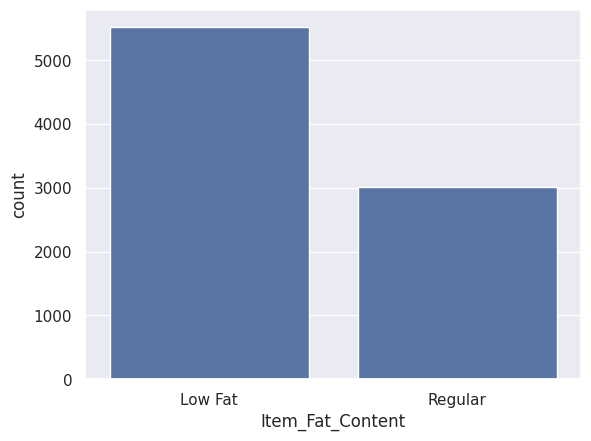

In [255]:
sns.countplot(x='Item_Fat_Content',data=sales_data)

In [256]:
#encoder
encoder = LabelEncoder()

In [257]:
#for para passar encoder em todas colunas
for i in sales_data.columns:
    if sales_data[i].dtype == 'object':
        sales_data[i] = encoder.fit_transform(sales_data[i])

In [258]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [259]:
X = sales_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = sales_data['Item_Outlet_Sales']

In [260]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [262]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


modelo de machine learning

In [263]:
regressor = XGBRegressor()

In [264]:

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

avaliacao

In [265]:
saler_data_prediction = regressor.predict(X_train)

In [266]:
r2_sales = metrics.r2_score(Y_train, saler_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8773882689577641


In [267]:
data_prediction = regressor.predict(X_test)

In [268]:
r2_data = metrics.r2_score(Y_test, data_prediction)
print('R Squared value = ', r2_data)

R Squared value =  0.5120068134878724


In [273]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999, 1, 0, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("o valor inicial eh", prediction[0])
print("as vendas para os primeiro produto do dataset são: ", saler_data_prediction[0])

[4635.5923]
o valor inicial eh 4635.5923
as vendas para os primeiro produto do dataset são:  2152.8064
